實作標準矩陣運算<br>
暫時移除非線性的計算<br>
層數 4 層<br>
訓練 為 一次函數<br>
<br>
輸入 1維資料<br>
第一層 2<br>
第二層 3<br>
輸出 1維資料<br>
<br>
採用 右乘法 x * w<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#定義常用函數
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [3]:
#準備訓練資料
x_data = np.linspace(-20, 20, 100, dtype = np.double)[:,np.newaxis]
y_data = -x_data.copy() + np.random.normal(0, 5, x_data.shape)

In [4]:
#學習速率
learning_rate = 0.001

In [5]:
#初始值
b1 = np.random.rand(1,2)
w1 = np.random.rand(1,2)

b2 = np.random.rand(1,3)
w2 = np.random.rand(2,3)

b3 = np.random.rand(1,1)
w3 = np.random.rand(3,1)

In [6]:
index = 0

batch = 30
temp_gradient_b3 = np.zeros(b3.shape)
temp_gradient_w3 = np.zeros(w3.shape)

temp_gradient_b2 = np.zeros(b2.shape)
temp_gradient_w2 = np.zeros(w2.shape)

temp_gradient_b1 = np.zeros(b1.shape)
temp_gradient_w1 = np.zeros(w1.shape)

while index < x_data.size * 30: 
    #x_data.size
    
    map_index = np.random.randint(x_data.size)
    #map_index = 0
    #map_index = index
    
    #Feedforward
    x1 = x_data[map_index] #11
    s1 = np.dot(x1, w1) + b1 #12
    a1 = s1
    
    x2 = a1 #12
    s2 = np.dot(x2, w2) + b2 #13
    a2 = s2
    
    x3 = a2 #13
    s3 = np.dot(x3, w3) + b3 #11
    a3 = s3
    
    y_Hat = a3 #11
    y_Real = y_data[map_index] #11
    
    #Backpropagation
    #===== 準備BP for b3 w3 =====
    delta_3_out = 2 * (y_Hat - y_Real)  
    delta_3_in = delta_3_out * 1; #print(delta_3_in)
    
    gradient_b3 = delta_3_in #11
    gradient_w3 = np.dot(np.transpose(x3), delta_3_in) #31
    
    #===== 準備BP for b2 w2 =====
    delta_2_out = np.dot(delta_3_in, np.transpose(w3))
    delta_2_in = delta_2_out * 1
    
    gradient_b2 = delta_2_in #13
    gradient_w2 = np.dot(np.transpose(x2), delta_2_in) #23
    
    #===== 準備BP for b1 w1 =====
    delta_1_out = np.dot(delta_2_in, np.transpose(w2))
    delta_1_in = delta_1_out * 1
    
    gradient_b1 = delta_1_in #12
    gradient_w1 = np.dot(np.transpose(x1), delta_1_in) #12
    
    #暫存
    temp_gradient_b3 = temp_gradient_b3 + gradient_b3
    temp_gradient_w3 = temp_gradient_w3 + gradient_w3
    temp_gradient_b2 = temp_gradient_b2 + gradient_b2
    temp_gradient_w2 = temp_gradient_w2 + gradient_w2
    temp_gradient_b1 = temp_gradient_b1 + gradient_b1
    temp_gradient_w1 = temp_gradient_w1 + gradient_w1
    
    if (index + 1) % batch == 0:
        #更新
        b3 = b3 - temp_gradient_b3 * learning_rate / (batch * 1.0)
        w3 = w3 - temp_gradient_w3 * learning_rate / (batch * 1.0)
    
        b2 = b2 - temp_gradient_b2 * learning_rate / (batch * 1.0)
        w2 = w2 - temp_gradient_w2 * learning_rate / (batch * 1.0)
        
        b1 = b1 - temp_gradient_b1 * learning_rate / (batch * 1.0)
        w1 = w1 - temp_gradient_w1 * learning_rate / (batch * 1.0)
        
        temp_gradient_b3 = np.zeros(b3.shape)
        temp_gradient_w3 = np.zeros(w3.shape)

        temp_gradient_b2 = np.zeros(b2.shape)
        temp_gradient_w2 = np.zeros(w2.shape)

        temp_gradient_b1 = np.zeros(b1.shape)
        temp_gradient_w1 = np.zeros(w1.shape)  
        #print('update')
    
    index = index + 1

In [7]:
new_y = np.zeros(y_data.shape)

index = 0
while index < x_data.size:
    
    x1 = x_data[index] #11
    s1 = np.dot(x1, w1) + b1 #12
    a1 = s1
    
    x2 = a1 #12
    s2 = np.dot(x2, w2) + b2 #13
    a2 = s2
    
    x3 = a2 #13
    s3 = np.dot(x3, w3) + b3 #11
    a3 = s3
    
    y_Hat = a3 #11

    new_y[index] = y_Hat #11
    
    index = index + 1

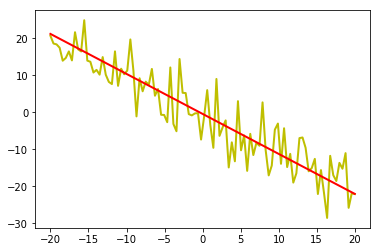

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x_data, y_data,'y-', lw = 2) #原本
ax.plot(x_data, new_y,'r-', lw = 2) #推測

plt.show()